## SEPARATION DE LA COLONNE INGREDIENT

### Importation des bibliothèques
Cette cellule importe les bibliothèques nécessaires à l'analyse (pandas, numpy, matplotlib) ainsi que des modules personnalisés pour le traitement et la visualisation des données.

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import importlib
import separer as sp

#Visualisation
import tableau_dynamique as td
import histogramme_marques as hm
import camembert_pays as cp
from IPython.display import HTML

importlib.reload(sp)

<module 'separer' from '/Users/mamadoubah/Desktop/predcompact-1/separer.py'>

### Chargement des données
Cette cellule vérifie l'existence du fichier Excel à plusieurs emplacements possibles et le charge dans un DataFrame pandas.

In [2]:
# Check if file exists and use correct path
import os

# Try different possible paths
file_paths = [
	'../Documents_ouverture_recherche/export_compacts_170325.xlsx',
	'./Documents_ouverture_recherche/export_compacts_170325.xlsx',
	'export_compacts_170325.xlsx',
	'../export_compacts_170325.xlsx'
]

file_found = False
for path in file_paths:
	if os.path.exists(path):
		data = pd.read_excel(path)
		print(f"File loaded successfully from: {path}")
		file_found = True
		break

if not file_found:
	print("File not found. Please check the file path and name.")
	print("Current working directory:", os.getcwd())
	print("Files in current directory:", os.listdir('.'))

File loaded successfully from: export_compacts_170325.xlsx


### Création du DataFrame
Création d'une copie du DataFrame chargé pour manipulation.

In [3]:
# Créer le DataFrame
data_ingredient = pd.DataFrame(data)

### Sélection de la colonne cible
Définition de la colonne contenant les ingrédients à analyser.

In [4]:
colonne_ingredient = "Ingrédients"
print(f"Utilisation de la colonne: {colonne_ingredient}")

Utilisation de la colonne: Ingrédients


### Séparation des ingrédients
Application de la fonction de séparation binaire pour transformer la liste d'ingrédients en colonnes individuelles (One-Hot Encoding) et suggestion de fusions pour les ingrédients similaires.

In [5]:
# Appliquer la séparation des ingrédients
data_avec_ingredients, liste_ingredients = sp.separer_ingredients_binaire(
    data_ingredient, 
    colonne_ingredient, 
    separateur=','
)

# Identifier les ingrédients similaires pour repérer d'autres doublons potentiels
sp.suggerer_fusions(liste_ingredients, seuil=0.8)

Nombre d'ingrédients uniques trouvés (avant fusion): 821
Nombre de colonnes créées (après fusion des doublons): 733


/Users/mamadoubah/Desktop/predcompact-1/separer.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_result[nom_colonne] = np.nan
/Users/mamadoubah/Desktop/predcompact-1/separer.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_result[nom_colonne] = np.nan
/Users/mamadoubah/Desktop/predcompact-1/separer.py:94: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste


ANALYSE DES SIMILARITÉS (DOUBLONS POTENTIELS)
Groupe 1: ['allyl methacrylates crosspolymer', 'methyl methacrylate crosspolymer']
Groupe 2: ['aloe barbadensis leaf extract', 'aloe barbadensis leaf extract*', 'aloe barbadensis leaf juice']
Groupe 3: ['aluminum chloride', 'aluminum hydroxide']
Groupe 4: ['aluminum dimyristate', 'aluminum distearate']
Groupe 5: ['amodimethicone', 'dimethicone', 'pca dimethicone', 'simethicone']
Groupe 6: ['amyl cinnamal', 'hexyl cinnamal']
Groupe 7: ['aqua (water', 'aqua (water)', 'aqua/water']
Groupe 8: ['argania spinosa kernel oil', 'argania spinosa kernel oil*']
Groupe 9: ['argilla/magnesium aluminum silicate', 'magnesium aluminum silicate']
Groupe 10: ['ascorbic acid', 'sorbic acid']
Groupe 11: ['ascorbyl dipalmitate', 'ascorbyl palmitate', 'ascorbyl tetraisopalmitate']
Groupe 12: ['bismuth oxychloride', 'ci 77163/bismuth oxychloride']
Groupe 13: ['butylene glycol', 'pentylene glycol', 'hexylene glycol']
Groupe 14: ['butylene/ethylene/styrene copolyme

### Sauvegarde des résultats
Sauvegarde du DataFrame transformé avec les ingrédients séparés dans un nouveau fichier Excel.

In [6]:
# Sauvegarder le dataset transformé
nom_fichier = "compacts_ingredients_binaires.xlsx"
chemin_sauvegarde = f"./Documents_ouverture_recherche/{nom_fichier}"

try:
    data_avec_ingredients.to_excel(chemin_sauvegarde, index=False)
    print(f"Dataset sauvegardé: {chemin_sauvegarde}")
except Exception as e:
    try:
        data_avec_ingredients.to_excel(nom_fichier, index=False)
        print(f"Dataset sauvegardé: {nom_fichier}")
    except Exception as e2:
        print(f"Erreur: {e2}")

Dataset sauvegardé: compacts_ingredients_binaires.xlsx


## TABLEAU CROISÉ DYNAMIQUE
### Affichage du tableau dynamique
Génération et affichage d'un tableau croisé dynamique interactif à partir des données traitées.

In [7]:
td.afficher_tableau_dynamique(data_avec_ingredients)

Tableau croisé dynamique - Nombre de produits par Marque et Groupe/Société:
(avec sous-totaux par groupe)


## HISTOGRAMME
### Visualisation des marques
Affichage d'un histogramme représentant la distribution ou les fréquences des marques présentes dans le dataset.

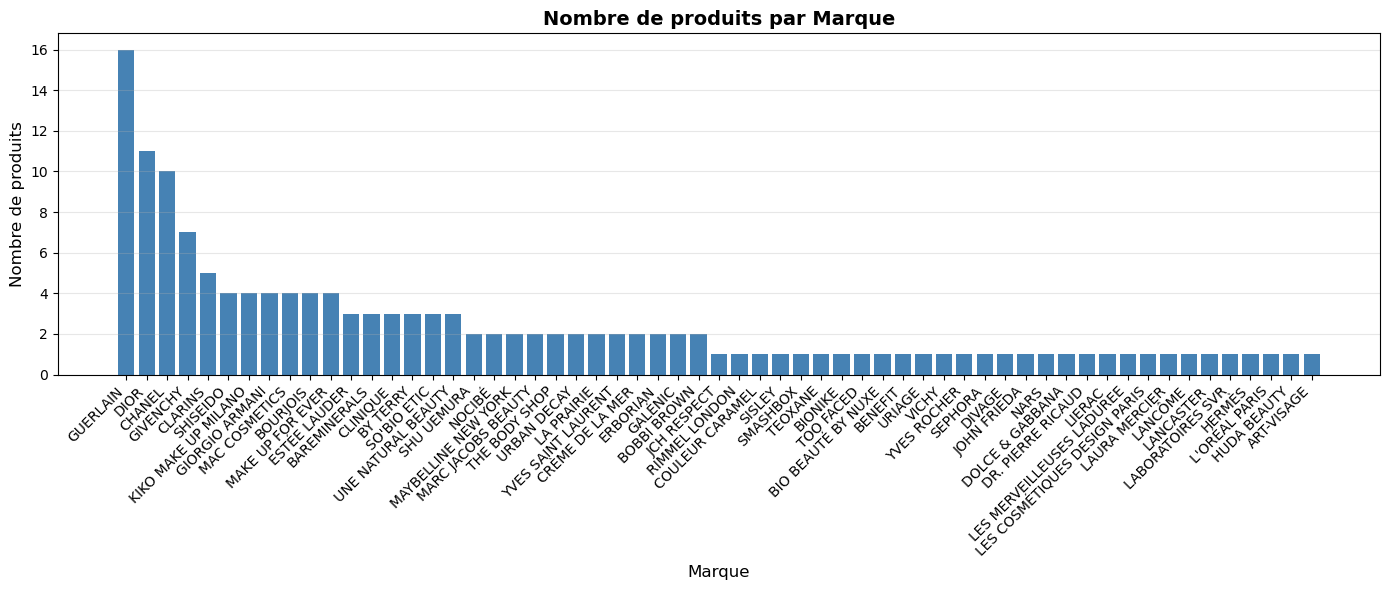


Total de marques: 59
Total de produits: 145


In [8]:
hm.afficher_histogramme_marques(data_avec_ingredients)

## DIAGRAMME CAMEMBERT
### Répartition par pays
Affichage d'un diagramme circulaire (camembert) montrant la répartition des produits ou ingrédients par pays.

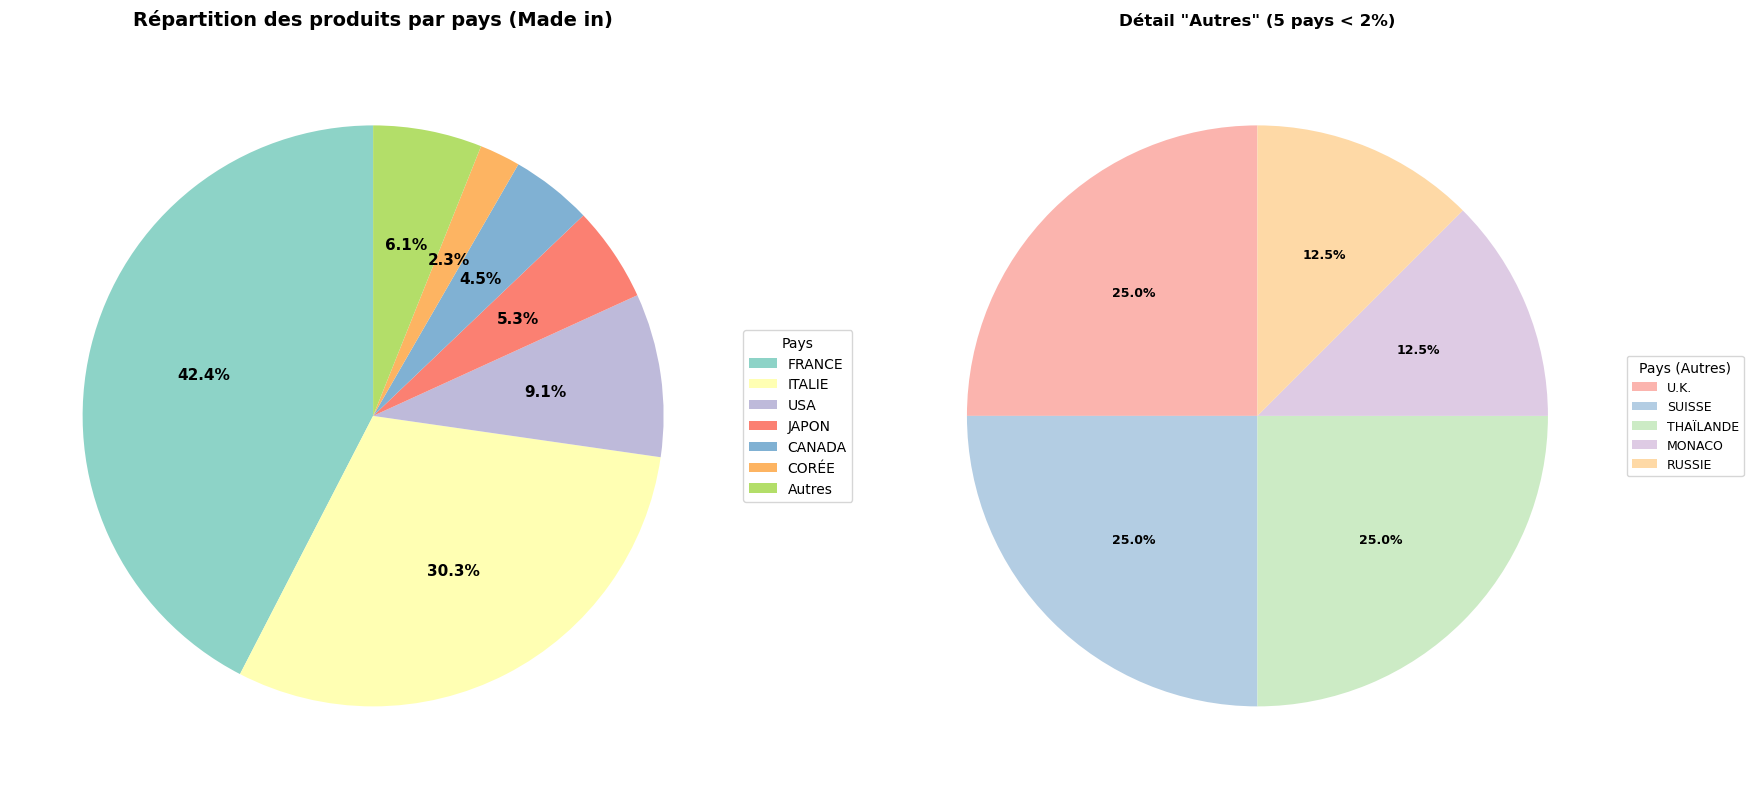


PAYS PRINCIPAUX (≥ 2%)
FRANCE: 56 produits (42.4%)
ITALIE: 40 produits (30.3%)
USA: 12 produits (9.1%)
JAPON: 7 produits (5.3%)
CANADA: 6 produits (4.5%)
CORÉE: 3 produits (2.3%)

AUTRES PAYS (< 2%)
U.K.: 2 produits (1.5%)
SUISSE: 2 produits (1.5%)
THAÏLANDE: 2 produits (1.5%)
MONACO: 1 produits (0.8%)
RUSSIE: 1 produits (0.8%)

Total 'Autres': 8 produits (6.1%)

TOTAL: 132 produits


In [9]:
cp.afficher_camembert_pays(data_ingredient)

## MATRICE DE CORRÉLATION DES INGRÉDIENTS
### Identification des colonnes
Identification des colonnes binaires générées correspondant aux ingrédients uniques, en excluant les colonnes d'origine.

In [10]:
# Identifier les colonnes d'ingrédients (colonnes binaires)
colonnes_binaires = [col for col in data_avec_ingredients.columns 
                     if col not in data_ingredient.columns]

### Calcul de la matrice de co-occurrence
Calcul d'une matrice qui compte combien de fois deux ingrédients apparaissent ensemble (co-occurrence). La diagonale est mise à zéro pour éviter l'auto-corrélation.

In [11]:
# Calculer la matrice de co-occurrence
df_ingredients = data_avec_ingredients[colonnes_binaires].copy()

# S'assurer que les données sont numériques (convertir en entiers)
df_ingredients = df_ingredients.fillna(0).astype(int)

# Produit matriciel: nombre de fois où deux ingrédients apparaissent ensemble
matrice_cooccurrence = df_ingredients.T.dot(df_ingredients)

# Mettre la diagonale à 0
np.fill_diagonal(matrice_cooccurrence.values, 0)

### Export de la matrice
Sauvegarde de la matrice de corrélation calculée dans une nouvelle feuille nommée 'Matrice Corrélation' du fichier Excel existant.

In [12]:
# Ajouter la matrice dans le fichier Excel
nom_fichier = "compacts_ingredients_binaires.xlsx"
chemin_sauvegarde = f"./Documents_ouverture_recherche/{nom_fichier}"

# Vérifier quel chemin utiliser
if not os.path.exists(chemin_sauvegarde):
    chemin_sauvegarde = nom_fichier

# Lire le fichier existant et ajouter la nouvelle feuille
try:
    # Ouvrir en mode ajout
    with pd.ExcelWriter(chemin_sauvegarde, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
        matrice_cooccurrence.to_excel(writer, sheet_name='Matrice Corrélation')
    
    print("✓ Succès!")
    print(f"✓ Fichier: {chemin_sauvegarde}")
    print("✓ Nouvelle feuille: 'Matrice Corrélation'")
    print(f"✓ Taille: {matrice_cooccurrence.shape[0]} × {matrice_cooccurrence.shape[1]}")
    
except Exception as e:
    print(f"Erreur: {e}")

✓ Succès!
✓ Fichier: compacts_ingredients_binaires.xlsx
✓ Nouvelle feuille: 'Matrice Corrélation'
✓ Taille: 733 × 733
